In [1]:

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
import pandas as pd

In [2]:
var_m_mall_data = pd.read_csv('/content/Mall_Customers.csv')

var_m_mall_data.info()
var_m_mall_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      190 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40


In [3]:
var_m_mall_data['Annual Income (k$)'].fillna(var_m_mall_data['Annual Income (k$)'].median(), inplace=True)

In [4]:
var_m_mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [5]:
le = LabelEncoder()
var_m_mall_data['Gender'] = le.fit_transform(var_m_mall_data['Gender'])
var_m_mall_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40
...,...,...,...,...,...
195,196,0,35,120.0,79
196,197,0,45,61.5,28
197,198,1,32,126.0,74
198,199,1,32,137.0,18


In [6]:
var_m_mall_data['Spending to Income Ratio'] = var_m_mall_data['Spending Score (1-100)'] / var_m_mall_data['Annual Income (k$)']
var_m_mall_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending to Income Ratio
0,1,1,19,15.0,39,2.600000
1,2,1,21,15.0,81,5.400000
2,3,0,20,16.0,6,0.375000
3,4,0,23,16.0,77,4.812500
4,5,0,31,17.0,40,2.352941
...,...,...,...,...,...,...
195,196,0,35,120.0,79,0.658333
196,197,0,45,61.5,28,0.455285
197,198,1,32,126.0,74,0.587302
198,199,1,32,137.0,18,0.131387


In [7]:
#normalisation
scaler = StandardScaler()
scaled_features = scaler.fit_transform(var_m_mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Spending to Income Ratio']])

In [8]:
var_scaled_mall_data = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income', 'Spending Score', 'Spending to Income Ratio'])
var_scaled_mall_data['Gender'] = var_m_mall_data['Gender']
var_scaled_mall_data.head()

,Age,Annual Income,Spending Score,Spending to Income Ratio,Gender
0,-1.424569,-1.812040,-0.434801,1.643927,1
1,-1.281035,-1.812040,1.195704,4.608997,1
2,-1.352802,-1.772298,-1.715913,-0.712244,0
3,-1.137502,-1.772298,1.040418,3.986861,0
4,-0.563369,-1.732556,-0.395980,1.382303,0


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [10]:
wcss = []
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(var_scaled_mall_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(var_scaled_mall_data, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

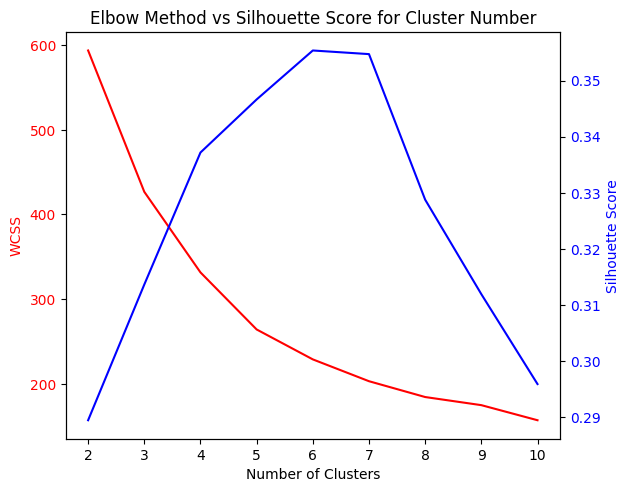

In [11]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

#used twin plot using subplot and twinx
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('WCSS', color='red')
ax1.plot(range(2, 11), wcss, color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='blue')
ax2.plot(range(2, 11), silhouette_scores, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
plt.title('Elbow Method vs Silhouette Score for Cluster Number')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42) #can also take 6 as n_clusters based on above graph
clusters = kmeans.fit_predict(var_scaled_mall_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
var_scaled_mall_data['Cluster'] = clusters

In [14]:
cluster_analysis = var_scaled_mall_data.groupby('Cluster').mean()
print(cluster_analysis)

              Age  Annual Income  Spending Score  Spending to Income Ratio  \
Cluster                                                                      
0        0.232793       1.019583       -1.333763                 -0.912456   
1       -0.475848       0.971360        1.245888                 -0.048111   
2       -0.772688      -0.323782       -0.223709                 -0.177548   
3       -0.956377      -1.460039        0.988656                  2.472464   
4        1.193678      -0.452587       -0.317667                 -0.210833   

           Gender  
Cluster            
0        0.593750  
1        0.487805  
2        0.333333  
3        0.380952  
4        0.431034  
